In [ ]:
# Instalando os pacotes necessários
!pip install wget

          date   open   high    low  close
204   1/7/2011  65.88  65.88  62.56  62.92
205  1/14/2011  62.70  63.86  62.56  63.13
206  1/21/2011  63.21  63.92  62.72  62.77
207  1/28/2011  62.87  63.31  62.14  62.21
208   2/4/2011  62.32  63.48  61.89  62.56
209  2/11/2011  62.67  64.75  62.32  63.57
210  2/18/2011  63.67  64.72  62.55  64.55
211  2/25/2011  63.36  64.40  63.33  64.31
212   3/4/2011  64.17  65.87  63.86  65.21
213  3/11/2011  65.32  65.84  64.47  64.81
date      object
open     float64
high     float64
low      float64
close    float64
dtype: object


<ipython-input-7-9aa9a8437322>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_open.set_xticklabels(labels=df_ko['date'], rotation=90)
<ipython-input-7-9aa9a8437322>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_close.set_xticklabels(labels=df_ko['date'], rotation=90)
<ipython-input-7-9aa9a8437322>:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot_all.set_xticklabels(labels=df_ko['date'], rotation=90)


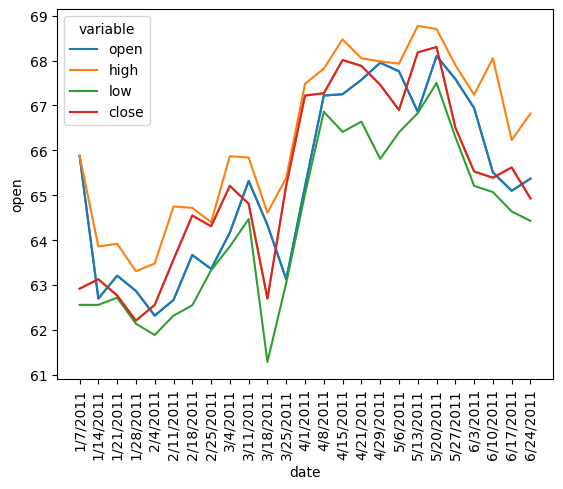

In [7]:
# Importando pacotes necessários
import wget
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1ª Parte: Fazendo o download dos dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00312/dow_jones_index.zip'
wget.download(url, 'dados.zip')

# 2ª Parte: Descompactando os dados
with zipfile.ZipFile('dados.zip', 'r') as fp:
    fp.extractall('dados')

# 3ª Parte: Renomeando o arquivo
os.rename('./dados/dow_jones_index.data', './dados/dow_jones_index.csv')

# 1º Exercício: Pandas
## a. Carregando o DataFrame
df = pd.read_csv('./dados/dow_jones_index.csv')

## b. Selecionando as linhas do dataframe original df em que a coluna stock é igual a KO
df_ko = df[df['stock'] == 'KO']

## c. Selecionando apenas as colunas de data e valores de ações
df_ko = df_ko[['date', 'open', 'high', 'low', 'close']]

## d. Limpando as colunas que possuem o caractere $ e convertendo para float
for col in ['open', 'high', 'low', 'close']:
    df_ko[col] = df_ko[col].apply(lambda value: float(value.split(sep='$')[-1]))

## e. Verificando os dados e seus tipos
print(df_ko.head(n=10))
print(df_ko.dtypes)

# 2º Exercício: Seaborn
## a. Visualizando os valores de abertura das ações ao longo do tempo e salvando a imagem
plot_open = sns.lineplot(x="date", y="open", data=df_ko)
plot_open.set_xticklabels(labels=df_ko['date'], rotation=90)
plot_open.figure.savefig("./ko_open.png")

## b. Visualizando os valores de fechamento das ações ao longo do tempo e salvando a imagem
plot_close = sns.lineplot(x="date", y="close", data=df_ko)
plot_close.set_xticklabels(labels=df_ko['date'], rotation=90)
plot_close.figure.savefig("./ko_close.png")

## c. Visualizando os quatro valores no mesmo gráfico
df_ko_melted = pd.melt(df_ko, ['date'])
plot_all = sns.lineplot(x="date", y="value", hue='variable', data=df_ko_melted)
plot_all.set_xticklabels(labels=df_ko['date'], rotation=90)
plot_all.figure.savefig("./ko_all.png")
